In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

# Gibbs Sampler Example 1

Adapted from [Codes for Unit 5: norcaugibbs.m](https://www2.isye.gatech.edu/isye6420/supporting.html).

Associated lecture video: [Unit 5 Lesson 11](https://www.youtube.com/watch?v=WXSZ8S_pZC0&list=PLv0FeK5oXK4l-RdT6DWJj0_upJOG2WKNO&index=47).

  0%|          | 0/100000 [00:00<?, ?it/s]

np.mean(thetas)=1.2810728558916804
np.var(thetas)=0.860464992070327
np.mean(lambdas)=0.9408560283549908
np.var(lambdas)=1.5703387617734375


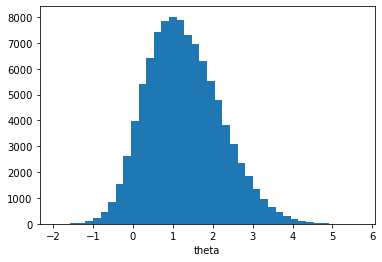

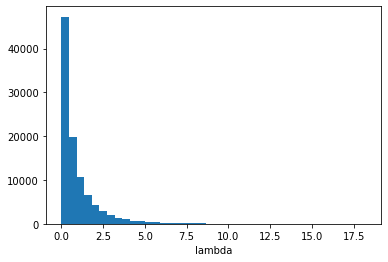

In [2]:
rng = np.random.default_rng(1)

obs = 100000
burn = 1000

# params
x = 2
sigma2 = 1
tau2 = 1
mu = 0

# inits
theta = 0
lam = 1

thetas = np.zeros(obs)
lambdas = np.zeros(obs)

# pre-generate randoms where possible
randn = rng.standard_normal(obs)

for i in tqdm(range(obs)):
    d = tau2 + lam * sigma2
    theta = (tau2 / d * x + lam * sigma2 / d * mu) + np.sqrt(tau2 * sigma2 / d) * randn[i]
    lam = rng.exponential(1 / ((tau2 + (theta - mu) ** 2) / (2 * tau2)))

    thetas[i] = theta
    lambdas[i] = lam

thetas = thetas[burn:]
lambdas = lambdas[burn:]

print(f"{np.mean(thetas)=}")
print(f"{np.var(thetas)=}")
print(f"{np.mean(lambdas)=}")
print(f"{np.var(lambdas)=}")

plt.hist(thetas, 40)
plt.xlabel("theta")
plt.show()

plt.hist(lambdas, 40)
plt.xlabel("lambda")
plt.show()